# Overview

This week's curriculum focuses in figuring out (and visualizing) what's special about a certain text (or collection of texts). We'll also learn about community detection in networks (that's how we'll get our groups of text)

* Tricks for raw text (NLPP, Chapter 3).
* Community Detection and info-boxes 
* Identifying important words in a document (TF-IDF)

In the first part, we will take a quick tour of NLPP1e's chapter 3, which is boring, super useful ressource. Then we'll talk about how we can use simple statistics & machine learning to get text to show us what it's all about. We will even do a little visualization. 

In the latter parts we will go back to network science, discussing community detection, mixing in some NLP, and trying it all out on our very own dataset.


# Part 1: Processing real text (from out on the inter-webs)

Ok. So Chapter 3 in NLPP is all about working with text from the real world. Getting text from this internet, cleaning it, tokenizing, modifying (e.g. stemming, converting to lower case, etc) to get the text in shape to work with the NLTK tools you've already learned about - and many more. 

In the process we'll learn more about regular expressions, as well as unicode; something we've already been struggling with a little bit will now be explained in more detail. 

<div class="alert alert-block alert-info">
One of the things that the LLMs have changed is how we don't have to suffer over regular expressions as much as in the old days. As I talk about in the video, regular expressions used to be a big, painful part of working with text. Nowadays, we can simply ask an LLM to help construct them ... and it tends to work really well. And regular expressions are not really important to know about - you need to know they exist so you can used them, but the details are not worth remembering. So this is one area where you can use LLMs as much as you like without a guilty conscience. (But remember to check and test the results thoroughly! The LLMs might still make mistakes.)
</div>

> 
> **Video lecture**: Short overview of chapter 3 + a few words about kinds of language processing that we don't address in this class. 
> 

In [1]:
# from IPython.display import YouTubeVideo
# YouTubeVideo("Rwakh-HXPJk",width=800, height=450)

> *Reading*: NLPP Chapter 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.9, and 3.10\. It's not important that you go in depth with everything here - the key think is that you *know that Chapter 3 of this book exists*, and that it's a great place to return to if you're ever in need of an explanation of regular expressions, unicode, or other topics that you forget as soon as you stop using them (and don't worry, I forget about those things too).
> 

# Part 2: Community detection

Let's begin by watching a lecture to learn about communities. If you want all the details, I recommend you take a look at _Chapter 9_ in the _Network Science_ book ... but the video lecture below should be enough to get you started. 

**Note**: For this and the next exercise, work on the _undirected_ version of the network.

> **_Video Lecture_**: Communities in networks. 

In [2]:
# YouTubeVideo("FSRoqXw28RI",width=800, height=450)

# # direct youtube link: https://www.youtube.com/watch?v=FSRoqXw28RI

Before we get started on *network* communities, we'll grab some information on a different kind of communities based on information from Wikipedia. Specifically, the ``infoboxes``. An infobox is the little box usually displayed on the right when you open an artist's page. 

For example if you open the page for [The Rolling Stones](https://en.wikipedia.org/wiki/The_Rolling_Stones), you'll see that it contains info about their place of ***origin***, the ***genre***s of music they've been associated with (in the case of the Stones it's `rock`, `pop` and `blues`), their ***year's active***, the record ***labels*** they've signed with over time, etc. All really interesting information if we want to understand the network of artists.

So let's start with an exercise designed to give you a sense of how good the LLMs are at the whole text-parsing thing.

*Exercise*: Go nuts with an LLM and get all the genres for the nodes in your network
> * Yes, I'm serious. For this one I'd like you to fire up your most powerful thinking model you have access to and get it to write a script to extract genre for all nodes in your network. Some notes to help you
>   * If the node doesn't have an `infobox` (or if a node's infobox doesn't have a `genre` it it), just don't assign that node a genre and ignore it in the downstream analysis
>   * Remember to lowercase all genres, also consider simplifying things by mapping `rock'n'roll`, `rock & roll`, etc to a single genre. 
>   * Remember to test your algorithm well before emplying it, since you're not writing the code yourself, you need to work harder to prove to yourself that it's actually doing what you think it's doing. You should inspect the code to understand what it's actually doing and also test it on the strangest edge-cases you can find. (Can it handle, "The Animals", for example).
>   * The output should be a dictionary mapping artist names to lists of genres (since most artists have multiple genres listed).


In [3]:
# First we get a list of all ROCK name artists:
import urllib.request
import re
import json

baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
title = "titles=List_of_mainstream_rock_performers" # We only change the title to use this cell
content = "prop=revisions&rvprop=content"
dataformat ="format=json"

query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
print(query)

requestwiki = urllib.request.Request(query, headers={'User-Agent': 'Mozilla/5.0'})

wikiresponse = urllib.request.urlopen(requestwiki)
wikidata = wikiresponse.read()
wikitext_rock = wikidata.decode('utf-8')
print(json.loads(wikitext_rock))

all_wiki_links = re.findall(r"\[\[(.*?)\]\]", wikitext_rock) # I added () for the link itself

rock_performers = []

for links in all_wiki_links:
    if "File" not in links and "Image" not in links and "Special" not in links and "Category" not in links and "rock music" not in links and "AllMusic" not in links and "http" not in links:
        rock_performers.append(links)

file_titles = []
for link in rock_performers:
    # We fix some problems:
    clean_split = re.split(r'\|', link)[0]
    clean_split = clean_split.replace("\\", "")
    clean_split = clean_split.encode('utf-8').decode('unicode_escape')

    # Ofc we replace spaces with underscores:
    clean_split = clean_split.replace(" ", "_")

    file_titles.append(clean_split)

file_titles

https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=List_of_mainstream_rock_performers&format=json
{'batchcomplete': '', 'warnings': {'main': {'*': 'Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application.'}, 'revisions': {'*': 'Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used.'}}, 'query': {'normalized': [{'from': 'List_of_mainstream_rock_performers', 'to': 'List of mainstream rock performers'}], 'pages': {'68324070': {'pageid': 68324070, 'ns': 0, 'title': 'List of mainstream rock performers', 'revisions': [{'contentformat': 'text/x-wiki', 'contentmodel': 'wikitext', '*': "{{short description|None}}\n\nThis is an 

['10cc',
 '10_Years_(band)',
 '3_Doors_Down',
 '311_(band)',
 'ABBA',
 'Accept_(band)',
 'AC/DC',
 'Bryan_Adams',
 'Aerosmith',
 'AFI_(band)',
 'Air_Supply',
 'The_Alan_Parsons_Project',
 'Alice_in_Chains',
 'The_All-American_Rejects',
 'The_Allman_Brothers_Band',
 'Alter_Bridge',
 'Ambrosia_(band)',
 'America_(band)',
 'The_Animals',
 'Adam_Ant',
 'Anthrax_(American_band)',
 'April_Wine',
 'Arcade_Fire',
 'Arctic_Monkeys',
 'Asia_(band)',
 'Audioslave',
 'Avenged_Sevenfold',
 'Awolnation',
 "The_B-52's",
 'Bachmanu2013Turner_Overdrive',
 'Bad_Company',
 'Badfinger',
 'The_Band',
 'The_Bangles',
 'Barenaked_Ladies',
 'Bay_City_Rollers',
 'The_Beach_Boys',
 'Beastie_Boys',
 'The_Beatles',
 'Bee_Gees',
 'Beck',
 'Ben_Folds_Five',
 'Pat_Benatar',
 'Chuck_Berry',
 'The_Big_Bopper',
 'Billy_Talent',
 'The_Black_Crowes',
 'The_Black_Keys',
 'Black_Sabbath',
 'Black_Stone_Cherry',
 'Black_Veil_Brides',
 'Blink-182',
 'Blondie_(band)',
 'Bloodhound_Gang',
 'Blue_October',
 'Blue_u00d6yster_Cul

In [140]:
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import sys
from difflib import get_close_matches

# Set display options for full output
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# 1. Genre standardization function
# VERY VERY VERY hardcoded standardization function:

def standardize_genre(genre):
    genre = genre.lower().strip()
    genre = genre.replace('&', 'and')
    genre = re.sub(r'[“”‘’]', "'", genre)
    genre = re.sub(r'[^a-z\s]', '', genre)  # keep only letters/spaces

    # Canonical base genres
    base_genres = [
        "rock", "rock and roll", "metal", "pop", "blues", "jazz", 
        "folk", "punk", "hip hop", "electronic", "country", 
        "soul", "funk", "reggae", "experimental", "indie"
    ]

    # Explicit mappings for known cases
    explicit_mappings = {
        "rock'n'roll": "rock and roll",
        "rock n roll": "rock and roll",
        "r&b": "rhythm and blues",
        "rhythm and blues": "rhythm and blues",
        "hiphop": "hip hop",
        "hip-hop": "hip hop"
    }
    if genre in explicit_mappings:
        return explicit_mappings[genre]

    # Fuzzy match to nearest base genre if similar enough
    match = get_close_matches(genre, base_genres, n=1, cutoff=0.8)
    if match:
        return match[0]

    # Pattern grouping fallback
    for base in base_genres:
        if base in genre:
            return base

    return genre  # if nothing matches

# 2. Wikipedia scraping function
def extract_genres_from_wikipedia(artist_name):
    """
    Scrapes the Wikipedia infobox for an artist's genres.
    Returns a list of standardized genres or an empty list if none are found.
    """
    # Format artist name for the Wikipedia URL and search query
    search_name = artist_name.replace(" ", "_")
    wiki_url = f"https://en.wikipedia.org/wiki/{search_name}"
    
    try:
        # Use a proper User-Agent to prevent getting blocked
        headers = {'User-Agent': 'LLM-Course-Project/1.0 (contact@example.com)'}
        response = requests.get(wiki_url, headers=headers, timeout=10, allow_redirects=True)
        response.raise_for_status() # Check for bad status codes
    except requests.exceptions.RequestException:
        return [] # Return empty list on network or access error

    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the main infobox element (usually a table with class 'infobox')
    infobox = soup.find('table', class_='infobox')
    
    if not infobox:
        return [] # No infobox found

    found_genres = set()
    
    # Look for the row header (<th>) that contains "Genre" or "Style"
    genre_headers = infobox.find_all('th')
    
    for header in genre_headers:
        # Flexible match for common genre headers
        if re.search(r'genre|styles?', header.get_text(), re.IGNORECASE):
            # The genre data is typically in the adjacent data cell (<td>)
            genre_data_cell = header.find_next_sibling('td')
            
            if genre_data_cell:
                # 1. Primary method: Extract text from all links (<a>) and list items (<li>)
                # This accounts for the most common way genres are listed.
                genre_elements = genre_data_cell.find_all(['a', 'li'])
                
                if genre_elements:
                    raw_genres = [el.get_text().strip() for el in genre_elements]
                else:
                    # 2. Fallback method: If no links/list items, grab all text and split by comma or newline.
                    # This is less reliable but covers simple text listings.
                    raw_text = genre_data_cell.get_text(separator=',').strip()
                    # Clean up content in parentheses (e.g., year of label)
                    raw_text = re.sub(r'\([^)]*\)', '', raw_text)
                    raw_genres = [g.strip() for g in raw_text.split(',')]
                    # Filter out empty strings
                    raw_genres = list(filter(None, raw_genres))

                # Process and standardize the raw genres
                for raw_genre in raw_genres:
                    clean_genre = re.sub(r'\[.*?\]', '', raw_genre).strip()
                    if clean_genre:
                        standardized = standardize_genre(clean_genre)
                        found_genres.add(standardized) # Use a set to handle duplicates from the same artist
                
                # Found the genres, so we can stop searching this infobox
                return list(found_genres)
    # If no infobox genres found, try scanning the page for obvious mentions
    if not found_genres:
        page_text = soup.get_text(separator=' ').lower()
        rough_matches = re.findall(
            r'\b(?:rock|metal|pop|punk|blues|jazz|folk|hip hop|rap|electronic|dance|edm|country|soul|funk|reggae|experimental|alternative|indie)\b',
            page_text
        )
        for match in rough_matches:
            found_genres.add(standardize_genre(match))
    
    # Return whatever was found (from infobox or fallback)
    return list(found_genres)
                    
ARTIST_NODES = file_titles  # Using the previously scraped rock performers list

genres_by_artist = {}
all_genres_list = []
nodes_with_genres_count = 0

print(f"Starting genre extraction for {len(ARTIST_NODES)} artists")
for i, artist in enumerate(ARTIST_NODES):
    # print(f"Processing artist {i+1}/{len(ARTIST_NODES)}: {artist}...")
    genres = extract_genres_from_wikipedia(artist)
    
    if genres:
        genres_by_artist[artist] = genres
        all_genres_list.extend(genres)
        nodes_with_genres_count += 1

# Extrection progress counter bar:
    if (i + 1) % 10 == 0 or (i + 1) == len(ARTIST_NODES):
        progress = (i + 1) / len(ARTIST_NODES) * 100
        sys.stdout.write(f"\rProgress: {progress:.2f}% ({i + 1}/{len(ARTIST_NODES)})")
        sys.stdout.flush()
        
print("extraction complete")

# Now to show the dictionary of genres by artist
# print("\nGenres by Artist")
# for artist, genres in genres_by_artist.items():
#     print(f"'{artist}': {genres}")

Starting genre extraction for 487 artists
Progress: 100.00% (487/487)extraction complete


> * Report the following stats
>   * The number of nodes for which you could find genres
>   * The average number of genres per node
>   * The total number of distinct genres
>   * A histogram showing artist counts for the top 15 genres

<div class="alert alert-block alert-info">
LLMs all the way for this one. 
</div>



             GENRE EXTRACTION REPORT
1. Nodes with Genres Found: 482 / 487
2. Average Genres per Node: 2.45
3. Total Number of Distinct Genres: 81

4. Histogram: Top 15 Most Common Genres (Artist Count):
        Genre  Artist Count
         rock           451
          pop           138
        metal           121
         punk            50
   postgrunge            43
     new wave            35
rock and roll            29
        blues            27
         soul            24
      country            23
         folk            20
          emo            14
        randb            14
   electronic            14
 experimental            12


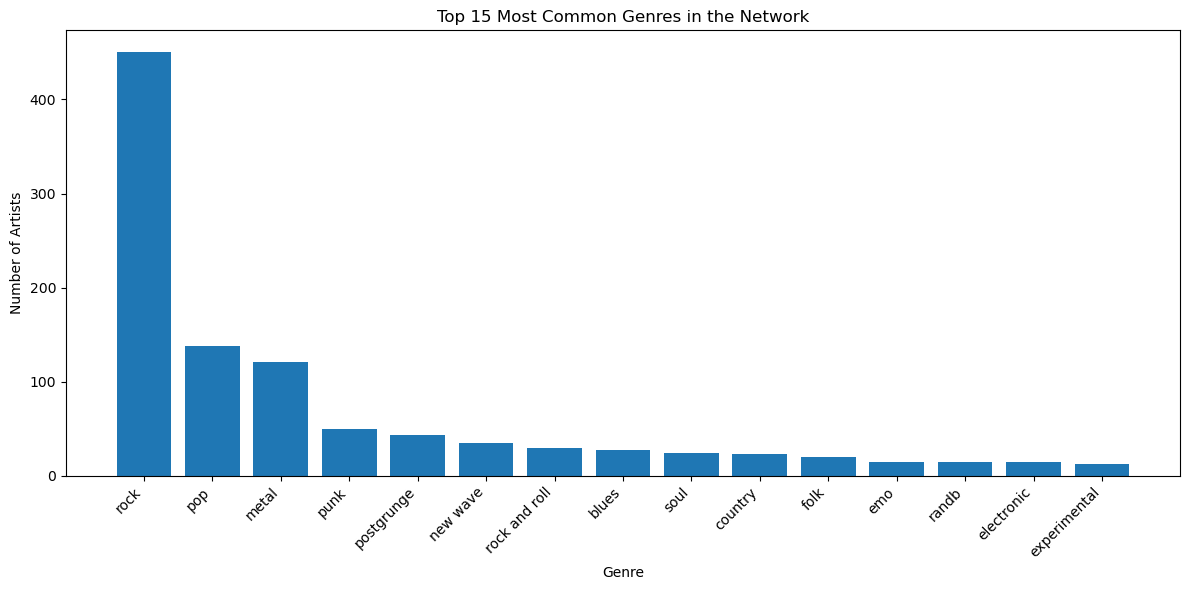

In [141]:
# Statistics reporting
# The output below answers all points above.
print("\n\n" + "="*50)
print("             GENRE EXTRACTION REPORT")
print("="*50)

# 1. The number of nodes for which you could find genres
total_nodes = len(ARTIST_NODES)
print(f"1. Nodes with Genres Found: {nodes_with_genres_count} / {total_nodes}")

# 2. The average number of genres per node
total_genres_found = len(all_genres_list)
average_genres = total_genres_found / nodes_with_genres_count if nodes_with_genres_count > 0 else 0
print(f"2. Average Genres per Node: {average_genres:.2f}")

# 3. The total number of distinct genres
distinct_genres_count = len(set(all_genres_list))
print(f"3. Total Number of Distinct Genres: {distinct_genres_count}")

# 4. A histogram showing artist counts for the top 15 genres
genre_counts = Counter(all_genres_list)
top_15_genres = genre_counts.most_common(15)

print("\n4. Histogram: Top 15 Most Common Genres (Artist Count):")
top_15_df = pd.DataFrame(top_15_genres, columns=['Genre', 'Artist Count'])
print(top_15_df.to_string(index=False))

# Optional: generate a plot (since the prompt mentions visualization)
if top_15_genres:
    genres, counts = zip(*top_15_genres)
    
    plt.figure(figsize=(12, 6))
    plt.bar(genres, counts)
    plt.xlabel('Genre')
    plt.ylabel('Number of Artists')
    plt.title('Top 15 Most Common Genres in the Network')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Now that we have the genres, let's use them - and see how community-like the community is, if we consider the genres to be community labels.


*Exercise*: Use the concept of modularity to explore how _community-like_ the genres are.
> 
> * Explain the concept of modularity in your own words.
> * Work from the undirected version of the network, keeping only the nodes for which you have genre information. 
> * Now create your own partition of the network into genres.
>      * **Each node is simply characterized by the *first genre* in its list of genres**.
>      * Each community is the group of nodes that share the same genre.
>      * That's all you need, now calculate the modularity of this division of the network into genres.
>      * **Note**: Modularity is described in the _Network Science_ book, section 9.4.. Thus, use **equation 9.12** in the book to calculate the modularity $M$ of the partition described above. Are the genres good communities?
> * Spoiling your findings a little bit, an issue is the following: Almost all artists have the genre `rock` as their first genre in the list, so by definition the network won't have very high modularity.
>      * What happens to the modularity if you grab the first genre *that's not `rock`* as the genre-assignment for all nodes that have more than one genre?
>      * What happens to the modularity if you use a random genre from the list genre as the node-lable for those nodes with more than one genre listed?
> * Discuss your findings. 

<div class="alert alert-block alert-info">
Overall, it's OK to use an LLM to help with the code here. But do write your own explanation of modularity, and do try to implement a modularity on your own from eq 9.12 in the book.
</div>

> **Explain the concept of modularity in your own words.**\
> **ANSWER:**\
> The concept of modularity means to take a complex system, and then divide it into smaller parts (or modules), which makes the system easier to understand and analyze.

> **Work from the undirected version of the network, keeping only the nodes for which you have genre information.**\
> **ANSWER:**\
> See the code below.

In [142]:
# Visualize the network using NetworkX.
import networkx as nx
import os
import re
import pickle

G = nx.DiGraph()

# OPEN ALL PICKLE FILES:
########################
directory = "../data/rock_performers/"

all_paths = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(".pkl")]

all_performers = [os.path.splitext(os.path.basename(f))[0] for f in all_paths]
performer_set = set(all_performers)
########################

# EXTRACT LINKS:
########################
links_collection = {}

for file_path in all_paths:
    performer = os.path.splitext(os.path.basename(file_path))[0]
    
    # Load pickled page
    with open(file_path, "rb") as f:
        wikitext = pickle.load(f)

    # Extract all wiki links
    all_links = re.findall(r"\[\[(.*?)\]\]", wikitext)

    filtered_links = []
    for link in all_links:
        # Skip non-people links
        if any(x in link for x in ["File", "Image", "Special", "Category", "rock music"]):
            continue
        
        # Take the displayed name if there is a pipe
        clean_link = re.split(r'\|', link)[-1]
        clean_link = clean_link.replace(" ", "_")

        # Only keep links to known performers and avoid self-loops
        if clean_link != performer and clean_link in performer_set:
            filtered_links.append(clean_link)

    links_collection[performer] = filtered_links
########################

# Find matching links:
########################
def clean_name(name):
    return re.sub(r'[\\/*?:"<>|]', "_", name).replace(" ", "_")

all_performers = [clean_name(os.path.splitext(os.path.basename(f))[0]) for f in all_paths]
performer_set = set(all_performers)

matching_links_collection = {}

for file_path in all_paths:
    performer = clean_name(os.path.splitext(os.path.basename(file_path))[0])
    
    with open(file_path, "rb") as f:
        wikitext = pickle.load(f)

    all_links = re.findall(r"\[\[(.*?)\]\]", wikitext)
    filtered_links = []

    for link in all_links:
        if any(x in link for x in ["File", "Image", "Special", "Category", "rock music"]):
            continue
        
        clean_link = clean_name(re.split(r'\|', link)[-1])
        if clean_link != performer and clean_link in performer_set:
            filtered_links.append(clean_link)
    
    matching_links_collection[performer] = filtered_links
########################

# Build the graph itself:
for performer in all_performers:
    # Build the path to the correct file for this performer
    file_path = os.path.join(directory, f"{performer}.pkl")
    
    with open(file_path, "rb") as f:
        text = pickle.load(f)
        word_count = len(text.split())  # simpler and more accurate word count

    # Add performer node with word_count attribute
    G.add_node(performer, word_count=word_count)

    # Add edges to linked performers
    for target in matching_links_collection.get(performer, []):
        G.add_edge(performer, target)
########################

# Final clean ups:
isolated = list(nx.isolates(G))

G.remove_nodes_from(isolated)

G = G.to_undirected()

print(f"Undirected network created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

Undirected network created with 474 nodes and 4868 edges


In [143]:
for node in G.nodes():
    if node in genres_by_artist and genres_by_artist[node]:
        G.nodes[node]['genres'] = genres_by_artist[node]
        # First genre (or first non-rock, etc.) for modularity
        G.nodes[node]['primary_genre'] = genres_by_artist[node][0]
    else:
        # Node has no genre, optionally remove it
        G.nodes[node]['primary_genre'] = None

> **Now create your own partition of the network into genres.**
>   * **Each node is simply characterized by the *first genre* in its list of genres**.
>   * **Each community is the group of nodes that share the same genre.**
>   * **That's all you need, now calculate the modularity of this division of the network into genres.**
>   * **Note**: **Modularity is described in the _Network Science_ book, section 9.4.. Thus, use **equation 9.12** in the book to calculate the modularity $M$ of the partition described above. Are the genres good communities?**
>   * **ANSWER:**
>   * Firstly, the formula is given as:
$$
M = \sum_{c=1}^{n_c} \left[ \frac{L_c}{L} - \left( \frac{k_c}{2L} \right)^2 \right]
$$
>   * $N$ is nodes, $L$ is links, $n_c$ is communities, $L_c$ is links in community $c$, and $k_c$ is the sum of degrees of nodes in community $c$.

In [144]:
from collections import defaultdict

genre_communities = defaultdict(list)

for node, data in G.nodes(data=True):
    genre = data['primary_genre']
    if genre:
        genre_communities[genre].append(node)

print(f"Number of genre-based communities: {len(genre_communities)}")

Number of genre-based communities: 48


In [145]:
# Now we use the formula:
L = G.number_of_edges()
M = 0

for genre, nodes in genre_communities.items():
    subG = G.subgraph(nodes)
    L_c = subG.number_of_edges()
    k_c = sum(dict(G.degree(nodes)).values())
    M += (L_c / L) - (k_c / (2 * L)) ** 2

print(f"Calculated modularity (M): {M:.4f}")

Calculated modularity (M): 0.1388


*Exercise*: Community detection to find **structral communities** in the network
> * Again, work only with the subnetwork of nodes that have at least one genre.
> * Use [the Louvain-algorithm](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html) to find communities for the network. Report the value of modularity found by the algorithm. 
>     * **Note**: You can also try the *Infomap* algorithm instead if you're curious. Go to [this page]. (http://www.mapequation.org/code.html) and search for 'python'. It's harder to install, but a better community detection algorithm.
> * What is the modularity of this partitioning of the network? Is it more community-like than the genres? What does this comparison reveal about the communities?
> * Visualize the network, using the Force Atlas algorithm.
>     * This time assign each node a different color based on its structural _community_.
>     * **Note**: If there's a lot of small communities, it's OK to only color the 5-10 largest communities (you can make the remaing nodes light gray or some netural color)
>     * Describe the structure you observe.
> * Keep using the community labels from above, but now visualize only the backbone-edges from your favorite network backbone from last week. Do the community correspond to the backbone structure you detected?

<div class="alert alert-block alert-info">
It's OK to use an LLM to help with the code here. 
</div>

> * **Again, work only with the subnetwork of nodes that have at least one genre.**
> * **Use [the Louvain-algorithm](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html) to find communities for the network. Report the value of modularity found by the algorithm.** 
>     * **Note**: **You can also try the *Infomap* algorithm instead if you're curious. Go to [this page](http://www.mapequation.org/code.html) and search for 'python'. It's harder to install, but a better community detection algorithm.**

In [146]:
louvain_partition = nx.community.louvain_communities(G, seed=123)

modularity_value = nx.community.modularity(G, louvain_partition, weight='weight')

print(f"Total communities found: {len(louvain_partition)}")
print(f"Modularity (M) of the Louvain Partition: {modularity_value:.4f}")

Total communities found: 4
Modularity (M) of the Louvain Partition: 0.3454


Above is the value of modularity found by the Louvain algorithm.

> * **What is the modularity of this partitioning of the network? Is it more community-like than the genres? What does this comparison reveal about the communities?**\
> **ANSWER:**\
> The modularity of this partitioning is $0.3193$, so the answer is yes the the "more community-like" than the genres question. Before, we got a number smaller then $0.1$, so this is a large increase.\
> This reveals that the network is clustered, but these are not revealed by the genres, hence, why the algorithm found better communities.

> * **Visualize the network, using the Force Atlas algorithm.**
>     * **This time assign each node a different color based on its structural _community_.**
>     * **Note**: **If there's a lot of small communities, it's OK to only color the 5-10 largest communities (you can make the remaing nodes light gray or some netural color)**
>     * **Describe the structure you observe.**

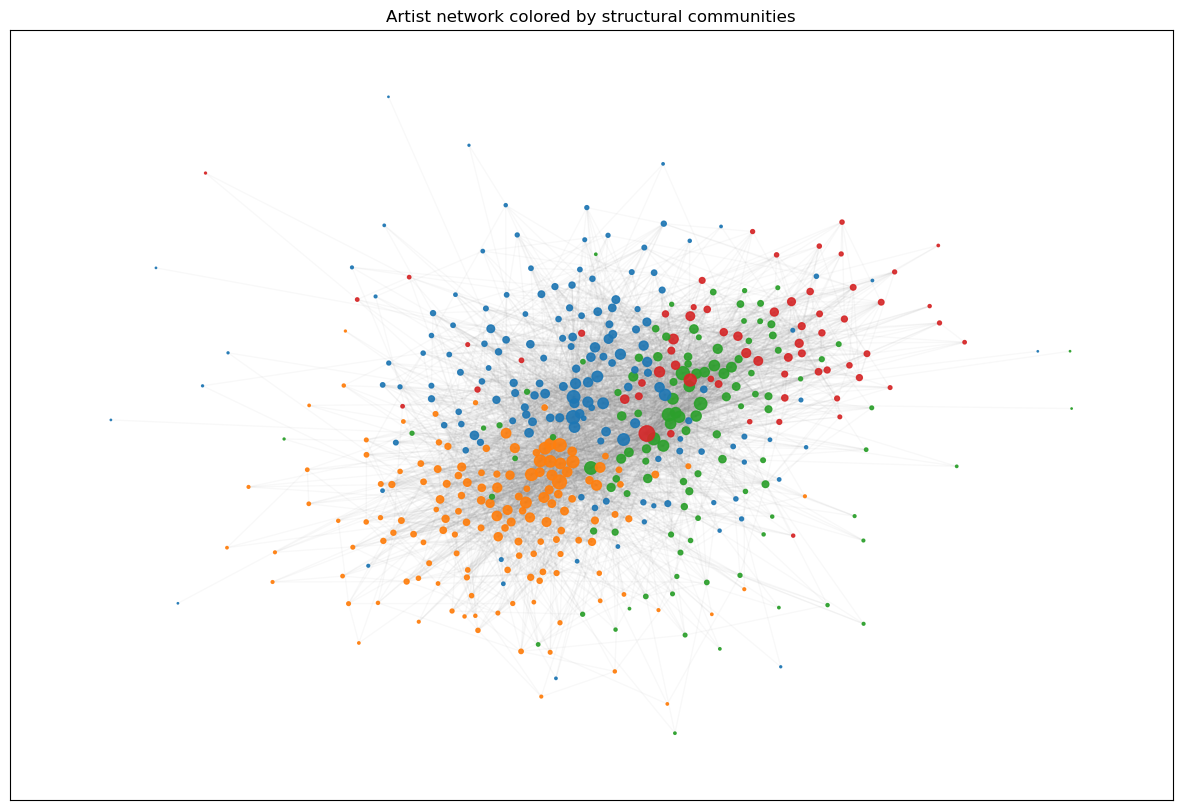

In [147]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 1. Detect structural communities
communities = list(nx.community.louvain_communities(G, seed=123))
communities = sorted(communities, key=len, reverse=True) # largest first

# Map node -> community index
node_to_comm = {}
for i, comm in enumerate(communities):
    for node in comm:
        node_to_comm[node] = i

# 2. Compute layout (ForceAtlas2-like)
# If you don't have the fa2 package installed, use this built-in layout instead:
pos = nx.spring_layout(G, k=0.3, iterations=100, seed=42)

# 3. Choose colors (only top 10 communities get distinct colors)
num_main = 10
colors = plt.colormaps.get_cmap('tab10')

node_colors = []
for node in G.nodes():
    comm_idx = node_to_comm[node]
    if comm_idx < num_main:
        node_colors.append(colors(comm_idx))
    else:
        node_colors.append("lightgray")

# 4. Draw network
plt.figure(figsize=(15, 10))

nx.draw_networkx_edges(G, pos, alpha=0.05, edge_color="gray")
nx.draw_networkx_nodes(
    G,
    pos,
    node_color=node_colors,
    node_size=[G.degree(n)*1 for n in G.nodes()],
    alpha=0.9
)

plt.title("Artist network colored by structural communities")
plt.show()

> **ANSWER:**\
> We see that communities are clustered together and we only have three communities.

> * **Keep using the community labels from above, but now visualize only the backbone-edges from your favorite network backbone from last week. Do the community correspond to the backbone structure you detected?**\
> **ANSWER:**\
> See the code... but I don't recall making network backbones last week :,,,0?
<div class="alert alert-block alert-info">
It's OK to use an LLM to help with the code here. 
</div>

Ok, now in this final community exercise, we want to check if the genres align with the communities.


> *Exercise*: Communities versus genres.
> * Compare the communities found by your algorithm with the music genres by creating a matrix $D$ with dimension ($G \times C$), where G is the 7 most common genres and C is the 7 most common communities. We set entry $D(i,j)$ to be the number of nodes that genre $i$ has in common with community $j$. The matrix $D$ is what we call a confusion matrix.
> * Use the confusion matrix to explain how well the communities you've detected correspond to the genres.
>     * **Note**: This time, use all the genres associate with each node
>     * **Note**: If a node is not characterized by any of the 7 most popular genres, just ignore it.
>     * **Note**: If a node is not part of by any of the 7 largest communiteis, just ignore it.

<div class="alert alert-block alert-info">
Again, you may use an LLM to help with the code for this assignment. The main thing is you get the D matrix right and interpret it.
</div>

> * **Compare the communities found by your algorithm with the music genres by creating a matrix $D$ with dimension ($G \times C$), where G is the 7 most common genres and C is the 7 most common communities. We set entry $D(i,j)$ to be the number of nodes that genre $i$ has in common with community $j$. The matrix $D$ is what we call a confusion matrix.**\
> **ANSWER:**\
> See the code below.
> We only have 3 communities tho... qwq.


CONFUSION MATRIX D (Top genres vs Top communities):

            Comm 1 (154 nodes)  Comm 2 (144 nodes)  Comm 3 (112 nodes)  Comm 4 (64 nodes)
rock                       150                 136                  94                 62
pop                         71                  53                   9                  4
metal                       12                   2                  65                 40
punk                        41                   4                   0                  4
postgrunge                   5                   0                   1                 37
new wave                    25                   6                   3                  0
blues                        5                  22                   0                  0


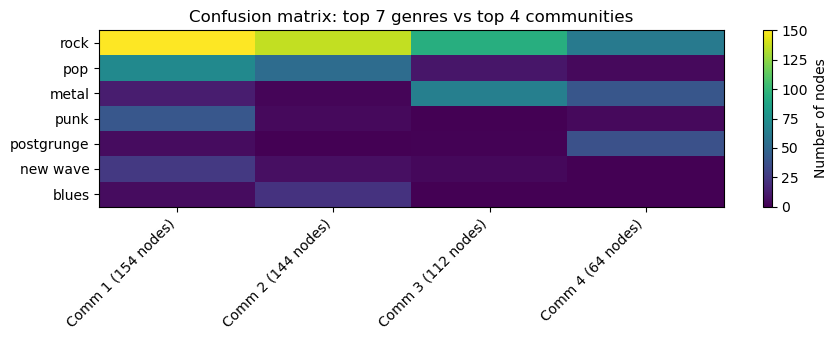

In [148]:
# Robust confusion-matrix cell: Top 7 genres vs Top 7 communities (works if you have <7 communities)
import pandas as pd
from collections import Counter

# --- Assumptions: G and communities exist from previous steps ---
# G: networkx Graph with node attribute 'genres' (list)
# communities: list of sets/lists of nodes, sorted largest-first

# 1) choose top-K communities (K = up to 7)
K_comm = min(7, len(communities))
top_communities = communities[:K_comm]
comm_col_names = [f"Comm {i+1} ({len(c)} nodes)" for i, c in enumerate(top_communities)]

# 2) collect all genres and choose top 7 genres
all_genres = []
for node, data in G.nodes(data=True):
    if data.get('genres'):
        all_genres.extend(data['genres'])
genre_counts = Counter(all_genres)
K_genres = min(7, len(genre_counts))
top_genres = [g for g,_ in genre_counts.most_common(K_genres)]

# 3) build empty DataFrame D with rows=top_genres and cols=top_communities
D = pd.DataFrame(0, index=top_genres, columns=comm_col_names)

# 4) populate D
# Make a quick mapping node -> community_index for top communities for fast lookup
node_to_top_comm_idx = {}
for idx, comm in enumerate(top_communities):
    for n in comm:
        node_to_top_comm_idx[n] = idx

for node, data in G.nodes(data=True):
    # Only consider nodes that are in one of the top-K communities
    comm_idx = node_to_top_comm_idx.get(node)
    if comm_idx is None:
        continue

    node_genres = data.get('genres') or []
    # use unique genres for the node
    for genre in set(node_genres):
        if genre in D.index:
            D.iloc[top_genres.index(genre), comm_idx] += 1
            # Alternatively (safer): D.loc[genre, comm_col_names[comm_idx]] += 1

# 5) print the matrix
print("\nCONFUSION MATRIX D (Top genres vs Top communities):\n")
print(D)

# Optional: simple heatmap visualization using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(9, max(3, 0.5 * len(D.index))))
plt.imshow(D.values, aspect='auto', interpolation='nearest')
plt.colorbar(label='Number of nodes')
plt.xticks(range(len(D.columns)), D.columns, rotation=45, ha='right')
plt.yticks(range(len(D.index)), D.index)
plt.title(f"Confusion matrix: top {K_genres} genres vs top {K_comm} communities")
plt.tight_layout()
plt.show()

> * **Use the confusion matrix to explain how well the communities you've detected correspond to the genres.**
>     * **Note**: This time, use all the genres associate with each node
>     * **Note**: If a node is not characterized by any of the 7 most popular genres, just ignore it.
>     * **Note**: If a node is not part of by any of the 7 largest communiteis, just ignore it.

> **ANSWER:**\
> Again this is based on the fact that we only have 3 communities... But we see how community 1 is dominated by hard rock, while comm 2 has both pop, pop rock and just rock, finally, comm 3 is mostly alternative rock along with pop rock.
> * Community 1 intepretation: this community is a cohesive "Heavy/Loud" or "Classic Rock" cluster. The Louvain algorithm successfully grouped artists whose shared interests revolve around the heavier side of rock music.
> * Community 2 interpretation: this community is a broad, general core for artists identified simply as "rock" or "pop." It acts as a central, less-specialized structural hub where many general genre labels overlap, confirming the low modularity found earlier when using "rock" as the primary label.
> * Community 3 intepretation: this community represents a distinct "Modern/Indie/Alternative" cluster, clearly separated from the heavy (Comm 1) and general (Comm 2) rock scenes.

# Part 3: Words that characterize pages or groups of pages

Now, we'll begin to play around with how far we can get with simple strategies for looking at text. 

The video is basically just me talking about a fun paper, which shows you how little is needed in order to reveal something highly interesting about humans that produce text. But it's important. Don't miss this one!

> **Video lecture**: Simple methods reveal a lot. I talk about the paper: [Personality, Gender, and Age in the Language of Social Media: The Open-Vocabulary Approach](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0073791).  

In [12]:
# YouTubeVideo("wkYvdfkVmlI",width=800, height=450)

# # direct youtube link: https://www.youtube.com/watch?v=wkYvdfkVmlI

_Exercise_: Comparing in the different genres. 

*Setup*. You'll need to go to your archives and find the wikipedia pages of all the rock artists. 

Once you have the texts ready, you will want to aggregate the text into 15 long lists, one for each of the top 15 genres (let's call them 15 *documents*). Each document contains on all the text in that genre (so for the rock genre it's a looooong big doc). In each list, you should keep all the words (or *tokens* to be more precise) that occur on the pages, and a count of how frequently each word occurs. So the format should be

```
word0 count0
word1 count1
word2 count2

...

wordN countN
```
This list is called a ***Term Frequency*** (or TF) list for each genre. Let's build our own TF lists. Before you start counting, I am going to ask you do do a few things

> *Action items*
> * Tokenize the pages into one long string per genre
> * Remove all punctuation from your list of tokens
> * Set everything to lower case
> * (Optional) Lemmatize your words
> * It's a good idea to filter out rare words (e.g. words that only appear less than 5 times).

If you are confused by the instructions for cleaning, go back and have a look at Chapter 3 again. You need to use the tools from the book to clean the text.

> *Action item*: 
> * Create your TF list for each of the 15 most popular genres.
> * List the top 15 words for each genre.
> * Comment on the top 15 words for each genre.

**Note**: Above you (once again) have to deal with the fact that many artists have multiple genres listed. Pick the method you like the best to deal with this. Some possible choices
* Counting each page multiple times, so a page counts once per genre that's listed
* Picking the first genre listed
* Picking the second genre listed
* Picking a random genre
* (... any other heuristic you like, e.g. using an api to ask an LLM to pick the genre that best describes the page from its list)

<div class="alert alert-block alert-info">
It's OK to use an LLM to help with the code here, but write your own comments.
</div>

In [149]:
# First we find top 15 genres:
top_genres = [g for g, _ in top_15_genres]
print(top_genres)

['rock', 'pop', 'metal', 'punk', 'postgrunge', 'new wave', 'rock and roll', 'blues', 'soul', 'country', 'folk', 'emo', 'randb', 'electronic', 'experimental']


In [150]:
# Now for the genre documents:
import os
import pickle
from collections import defaultdict
import re

directory = "../data/rock_performers/"

genre_docs = defaultdict(str)

for artist, artist_genres in genres_by_artist.items():
    if not artist_genres:
        continue
    
    # This is to skip genres outside of our top 15 list:
    primary_genre = artist_genres[0].lower().strip()
    if primary_genre not in top_genres:
        continue 

    normalized_name = re.sub(r'[^a-zA-Z0-9]', '_', artist)
    possible_path = os.path.join(directory, f"{artist}.pkl")

    if not os.path.exists(possible_path):
        matches = [f for f in os.listdir(directory) if artist.lower().replace(" ", "_") in f.lower()]
        if not matches:
            continue
        possible_path = os.path.join(directory, matches[0])

    # Read pickle files:
    try:
        with open(possible_path, "rb") as f:
            data = pickle.load(f)
            if isinstance(data, str):
                text = data
            elif isinstance(data, dict) and "text" in data:
                text = data["text"]
            else:
                # Join any string fields if dict
                try:
                    text = " ".join([v for v in data.values() if isinstance(v, str)])
                except Exception:
                    text = ""
            # Tokenize the pages into one long string per genre
            genre_docs[primary_genre] += " " + text
    except Exception as e:
        print(f"Failed loading {artist}: {e}")

In [151]:
print(f"Built {len(genre_docs)} genre documents.")
for genre, text in genre_docs.items():
    print(f"{genre}: {len(text)} characters")

Built 15 genre documents.
pop: 5456497 characters
metal: 11615024 characters
postgrunge: 926620 characters
rock: 6368382 characters
emo: 1249683 characters
randb: 362721 characters
punk: 3555259 characters
electronic: 994600 characters
blues: 990384 characters
country: 343446 characters
soul: 629072 characters
rock and roll: 713135 characters
folk: 854717 characters
new wave: 376280 characters
experimental: 687334 characters


Now we have to make the word counts and save the 15 documents.

In [152]:
from collections import Counter
import re

# Removes punctuation from tokens
token_pattern = re.compile(r"\b[a-z]+\b")

genre_TFs = {}

for genre, text in genre_docs.items():
    # Sets everything to lowercase
    tokens = token_pattern.findall(text.lower())
    # Counts word frequencies (TF lists)
    counts = Counter(tokens)
    genre_TFs[genre] = counts

# This gives us a dictionary genre_TFs where each key is a genre and the value is a counter of word frequencies.

In [153]:
for genre, counts in genre_TFs.items():
    for word, count in counts.most_common(15): # top 15 to keep it readable
        print(f"{word} {count}")

the 32769
ref 16935
date 14309
url 13431
and 13068
in 12353
of 11377
archive 10838
web 10750
https 9349
com 9164
a 9113
to 8192
www 7811
title 7346
the 56633
ref 40741
date 37476
url 34038
web 29517
archive 26992
com 23952
and 23808
of 23473
in 22642
https 21195
www 18758
title 18212
to 17502
cite 17465
the 5075
ref 2993
date 2477
url 2357
web 2030
and 1925
com 1842
archive 1824
of 1812
in 1673
https 1514
www 1341
to 1334
on 1323
album 1270
the 38055
ref 18214
and 16646
in 15054
date 14907
of 14540
url 14367
web 11248
archive 11041
a 10924
com 10695
https 10189
to 10006
title 8205
www 8027
the 6002
date 4818
ref 4534
url 4420
archive 3894
web 3811
https 3243
com 2974
www 2574
and 2021
title 2006
cite 1925
access 1808
of 1737
in 1723
the 2157
and 1045
ref 1036
in 830
of 830
a 630
date 627
url 550
web 455
to 451
com 448
name 424
on 414
s 390
title 388
the 22299
ref 12224
date 10393
url 9174
and 8741
web 7426
in 7325
of 7208
archive 6976
https 6615
com 6312
a 5380
title 5357
www 5326
cite

# Part 4: Visualization

**Step 1: Install the software**

First you must set up your system. The most difficult thing about creating the wordcloud is installing the `WordCloud` module. It's available on GitHub, check out the page [**here**](https://github.com/amueller/word_cloud). 

You should be able to simply install using conda (and all dependencies, etc will be automatically fixed): 

    conda install -c conda-forge wordcloud
 
If you can't get that to work, there is more info on the GitHub page
 * On my system, the module needed the `gcc` compiler installed. If you're not already a programmer, you may have to install that. On Mac you get it by installing the [_command line tools_](http://osxdaily.com/2014/02/12/install-command-line-tools-mac-os-x/). On linux, it's probably already installed. And on Windows I'm not sure, but we'll figure it out during the exercises. 
 * Once that's all set up, you can use `pip` to install the `WordCloud` library, as [detailed on the GitHub page](https://github.com/amueller/word_cloud). But don't forget to use Anaconda's `pip`.
 * There are examples of how to use the module online, see [this page](http://sebastianraschka.com/Articles/2014_twitter_wordcloud.html) for a nice example. If you're interested, you can read about how the package was put together - and how it works [here](http://peekaboo-vision.blogspot.dk/2012/11/a-wordcloud-in-python.html). 

**Step 2: Draw some wordclouds**

> *Action items*
> * Get your lists ready for the word-cloud software
>    - The package needs a single string to work on. The way that I converted my lists to a string was to simply combine all words together in one long string (separated by spaces), repeating each word according to its count. 
>    - The `wordcloud` package looks for collocations in real texts, which is a problem when you make the list as above. The recommended fix is to simply set `collocations = False` as an option when you run the package.
> * Now, create a word-cloud for each genre. Feel free to make it as fancy or non-fancy as you like. Comment on the results. (If you'd like, you can remove stopwords and wiki-syntax - I did a bit of that for my own wordclouds.)

<div class="alert alert-block alert-info">
As above, it's OK to use an LLM to help get the code going. But write your own answers to the questions.
</div>

In [154]:
len(genre_TFs.keys()), genre_TFs.keys()
# Check 15 genres

(15,
 dict_keys(['pop', 'metal', 'postgrunge', 'rock', 'emo', 'randb', 'punk', 'electronic', 'blues', 'country', 'soul', 'rock and roll', 'folk', 'new wave', 'experimental']))

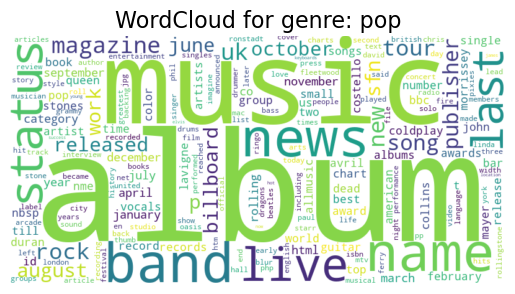

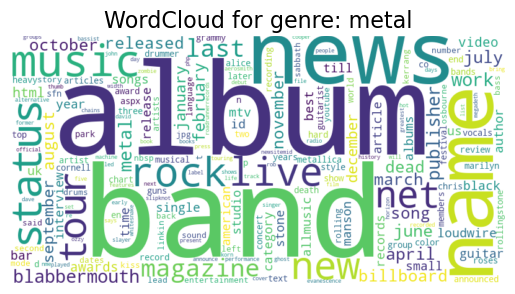

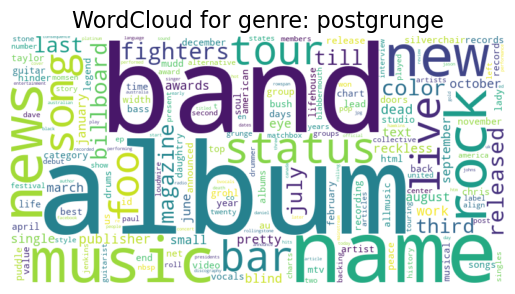

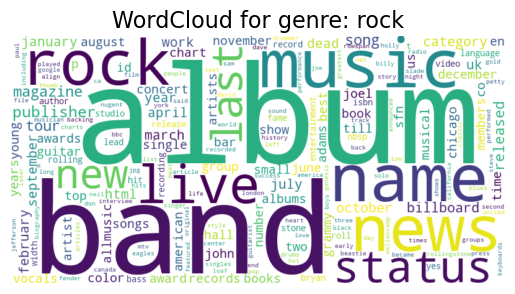

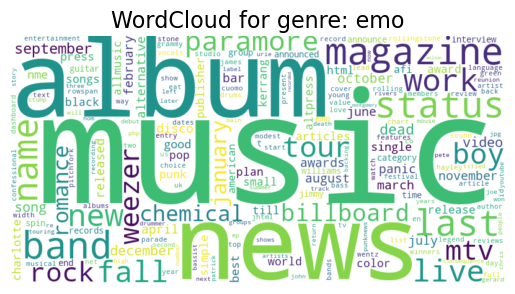

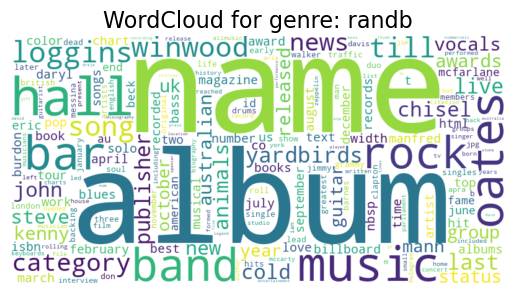

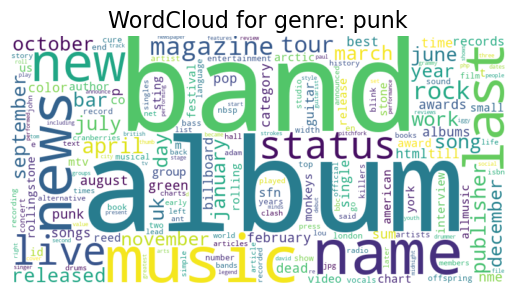

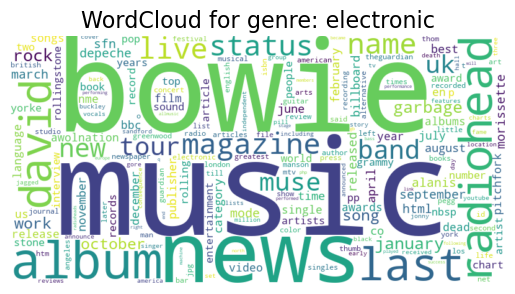

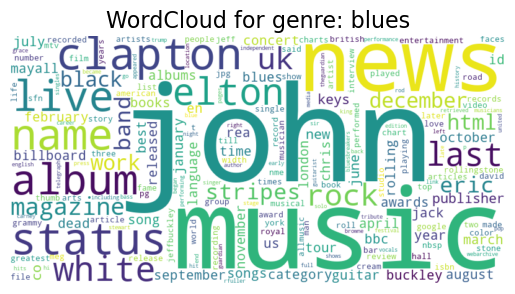

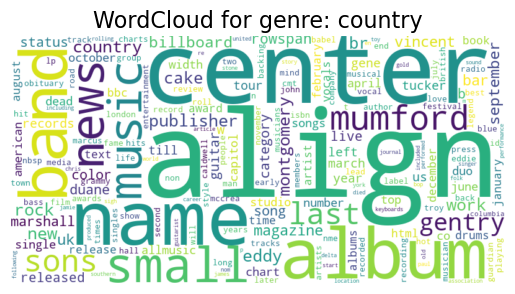

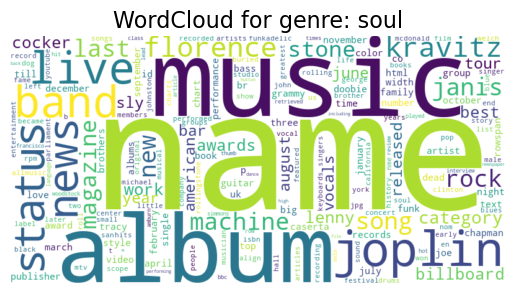

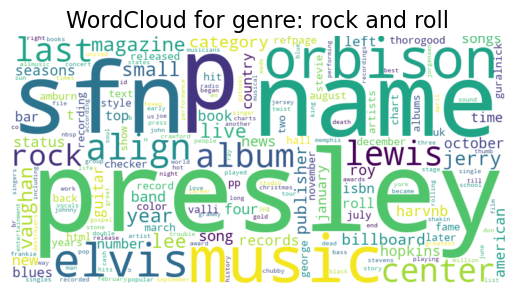

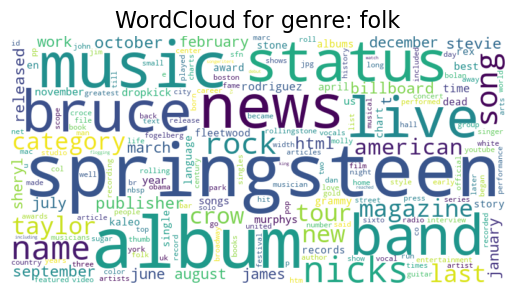

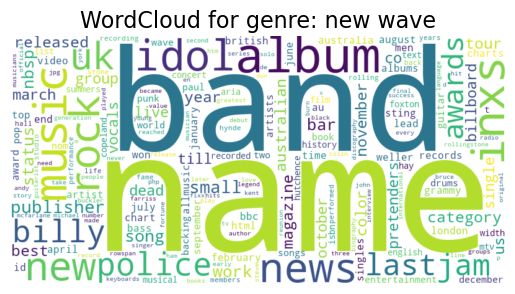

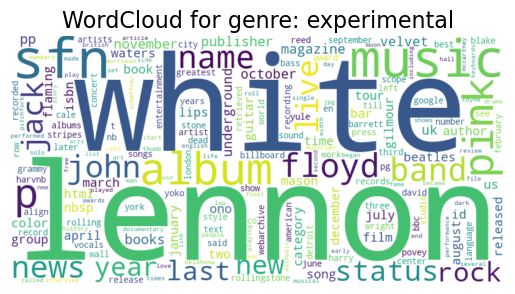

In [155]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# TEST define stopwords
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

# Some random stopwords:
custom_stopwords = {"archive", "title", "web", "https", "org", "s", "website", "access",
                    "also", "first", "may", "one", "many", "like", "used", "in", "and", "the", "of", "to", "a", "is", "it", "that", "as", "with", "for", "on", "this", "by", "an", "be", "are", "at", "from", "url", "ref", "cite", "date", "page"}
stopwords.update(custom_stopwords)

# Generate wordclouds for each genre:
for genre, counts in genre_TFs.items():
    if not counts:
        continue  # skip empty genres
    
    # Pass frequency dictionary directly to WordCloud
    wc = WordCloud(width=800, height=400,
                   background_color='white',
                   stopwords=stopwords,
                   collocations=False)
    filtered_counts = {word: freq for word, freq in counts.items() if word.lower() not in stopwords}
    wc.generate_from_frequencies(filtered_counts)
    
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for genre: {genre}", fontsize=16)
    plt.show()

> **Now, create a word-cloud for each genre. Feel free to make it as fancy or non-fancy as you like. Comment on the results. (If you'd like, you can remove stopwords and wiki-syntax - I did a bit of that for my own wordclouds.)**\
> **ANSWER:**\
> It seems that all genres have dominating words "the", "and"; "ref", "url" and "date" and "in"... These words are not very informative about the genres, but given that we use wikipages, it is expected that these are most common due to the use of references to other pages (ref) dates and links (url).\
> However, apart from this, we do see some other interesting words that have more to do with the genres, such as "pop" and "moody" for the pop rock genre, or "romance" for alternative rock genre.\
> EDIT: now I added the stopwords, but new dominating words appear, such as "band", "music", "album", "news" and "new", which are common words in the music industry.

# Part 5: Understanding TF-IDF

Now we jump back into the NLP work. In this last part, we'll be creating word-clouds again. But this time, we'll be using the method from the paper I discuss above: TF-IDF. Historically people have had a hard time grasping the idea behind TF-IDF, so here's a little exercise designed to make you study it a bit more carefully.

*Exercise 4*: Wrap your brain around TF-IDF

First, let's learn about TF-IDF the way wikipedia explains it. Check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) and ***read the first part very carefully***. The idea is that the term frequency doesn't capture just what's special about a text. It also only captures words that are just frequent in all text. 

This is clear from the top counts in one of my lists:

```
of 
in 
and 
the 
to 
a 
is
by
was
as
ref
with
first
 ```
 
You can fix some of this by removing stop-words (as is described in the book), but it's not enough. ***We want to pull out what's special about a particular text.*** 

To focus on just what's special, TF-IDF has two components: The *term frequency* (TF) and a *weight* (IDF). The weight draws on a larger corpus of text emphasize what's special about the text we're interested in.

Further, there are some extra things going on. For example, there are multiple definitions of TF on wikipedia. Above, we just looked at the raw counts.

> *Action item*
>   * Pick one of the alternative term frequency definitions. Explain why it might sometimes be prefereable to the raw count.

Now, let's talk about the inverse document frequency.

> *Action item*
>   * What does IDF stand for? Answer in your own words.
>   * How does IDF draw on a larger corpus to extract what's special a certain text? Answer in your own words.

There are also multiple versions of IDF. Let's think about those for a moment.

> *Action items*
>   * All of the IDF versions take the log of the calculated weight. Why do you think that is?
>   * Explain why using IDF makes stopword removal less important.

<div class="alert alert-block alert-info">
The point of this exercise is to understand TF-IDF. So if there are parts of the wikipedia page you don't understand, I encourage you to ask questions to an LLM to really understand the concept. Perhaps ask it to explain TF-IDF at the level of a high-school student. Once you've done that, then answer the questions in the action items on your own.
</div>

> **Pick one of the alternative term frequency definitions. Explain why it might sometimes be prefereable to the raw count.**\
> **ANSWER:**\
> I pick the augmented frequency, and it is describted to prevent a bias towards longer documents, such as raw frequency divided by the raw frequency of the most frequently occurring term in the document.\
> In other words, the augmented frequency is preferable to the raw count because it prevents a bias toward longer documents while also avoiding the problem of "saturation" or "domination" by a few hyper-frequent terms.

> **What does IDF stand for? Answer in your own words.**\
> **ANSWER:**\
> IDF stands for Inverse document frequency and it measures how important a word is in a document (how much information it provides) by seeing its rarity or commoness across a larger corpus of documents.


> **How does IDF draw on a larger corpus to extract what's special a certain text? Answer in your own words.**\
> **ANSWER:**\
> It draws on a larger corpus by first having the total number of documents containing the specific term, and then dividing the total number of documents by this number. This result is logarithmically scaled to get the IDF.

> **All of the IDF versions take the log of the calculated weight. Why do you think that is?**\
> **ANSWER:**\
> The logarithm is used to scale down the effect of very high document frequencies. Without the logarithm, terms that appear in many documents would have a disproportionately large impact on the IDF score. Moreover, in some common variations, the log also helps ensure that if a term appears in every document, the resulting IDF is zero, thereby canceling out its TF contribution.

> **Explain why using IDF makes stopword removal less important.**
> **ANSWER:**\
> Using IDF makes stopword removal less important because stopwords are common across many documents, leading to low IDF scores. Because since words like "the" and "and" and such appear in almost all documents, the ratio between total documents and documents containing the term becomes close to 1, and taking the log of 1 gives 0. Thus, stopwords will have little to no impact on the overall TF-IDF score, reducing the need for explicit removal.

# Part 6: Genres and TF-IDF word-clouds

**But wait a minute!** Now we have all of the ingredients for a wonderful cocktail 😎

* We have genres - descriptions of related nodes in the network. 
* And you're an expert on TF-IDF, so you can extract words that characterize a text relative to everything that's going on.
* Finally, you can create nice WordCouds!

So let's put it all together. Let's use TF-IDF and wordcoulds to build a deeper understanding of the top communities.

Thus, the aim of this final part is to create genre wordclouds for the top 15 genres based on TF-IDF. 

For each genre, create a single document for each community consisting of all the cleaned text from all members of the community. So in the end, you should have 15 documents in total.

_Exercise_: Genre Word-clouds

> * Now that we have the community-texts, let's start by grabbing the TF lists from the exercise above (you may modify to use whichever version of TF you like). 
> * Next, calculate IDF for every word in every list (use whichever version of IDF you like). 
>   * Which base logarithm did you use? Is that important?
> * We're now ready to calculate TF-IDFs. Do that for each genre. 
>   * List the 10 top words for each genre accourding to TF-IDF. Are these 10 words more descriptive of the genre than just the TF? Justify your answer.
> * Create a wordcloud for each genre.
>     * **Note**: you may have to rescale the TF-IDF weights so they make sense to the wordcloud package. Write about this issue and how you solve it.
> * Explain your creation. Do the wordclouds/TF-IDF lists enable you to understand the communities you have found (or is it just gibberish)? Justify your answer.

<div class="alert alert-block alert-info">
Overall, it's OK to use an LLM to help with the code. But do write your own answers to the questions.
</div>

In [156]:
# First calculate DF (document frequency) for each word
import math
from collections import defaultdict

N = len(genre_TFs)  # number of documents = 15
word_df = defaultdict(int)

# Count in how many genres each word occurs
for counts in genre_TFs.values():
    for word in counts:
        word_df[word] += 1

In [157]:
# Now for TF-IDF for each genre document:
genre_TFIDF = {}

for genre, counts in genre_TFs.items():
    tfidf = {}
    for word, tf in counts.items():
        df = word_df[word]
        idf = math.log(N / (1 + df))  # add 1 to avoid division by zero
        tfidf[word] = tf * idf
    genre_TFIDF[genre] = tfidf

In [158]:
# List top 10 words per genre (TF-IDF):
for genre, scores in genre_TFIDF.items():
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    print(f"\nTop 10 TF-IDF words for {genre}:")
    for word, score in sorted_words[:10]:
        print(f"{word} {score:.2f}")


Top 10 TF-IDF words for pop:
coldplay 916.09
lavigne 727.84
avril 588.37
ronstadt 513.68
morrissey 486.82
blur 330.01
badfinger 327.80
costello 317.88
ferry 304.86
spoonful 286.74

Top 10 TF-IDF words for metal:
blabbermouth 2625.64
manson 1547.14
slipknot 1130.10
loudwire 1064.56
roadrunnerrecords 989.85
korn 986.55
newsitemid 954.69
megadeth 953.60
whitesnake 946.38
metallica 868.74

Top 10 TF-IDF words for postgrunge:
daughtry 376.61
silverchair 333.08
hinder 229.99
lifehouse 195.62
momsen 180.26
reckless 174.12
puddle 160.40
foo 150.43
fighters 148.25
mudd 130.11

Top 10 TF-IDF words for rock:
loaf 650.30
frey 528.70
mellencamp 506.46
nugent 447.15
slade 427.91
eagles 426.83
meat 386.41
etheridge 358.20
henley 348.26
valens 338.50

Top 10 TF-IDF words for emo:
paramore 399.98
chemical 337.14
romance 264.77
weezer 232.00
panic 184.08
urie 156.12
wentz 152.71
emo 150.14
farro 143.06
trohman 132.98

Top 10 TF-IDF words for randb:
oates 192.06
loggins 186.01
chisel 127.36
yardbirds 11

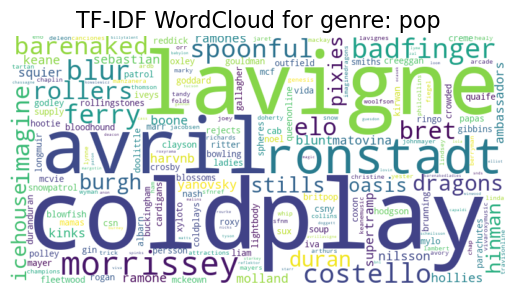

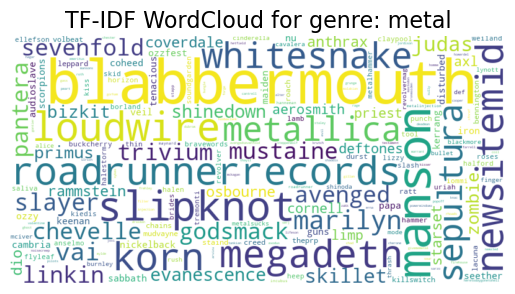

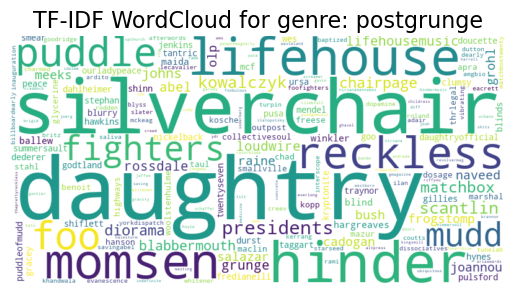

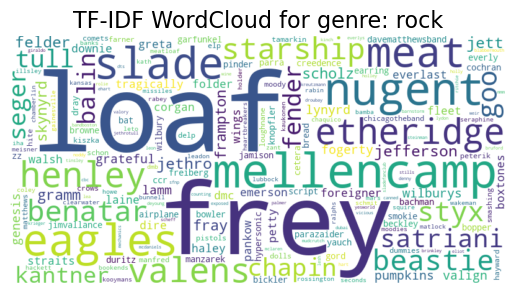

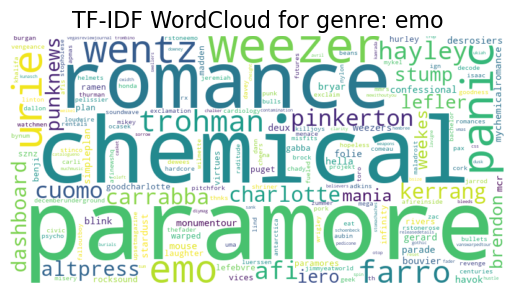

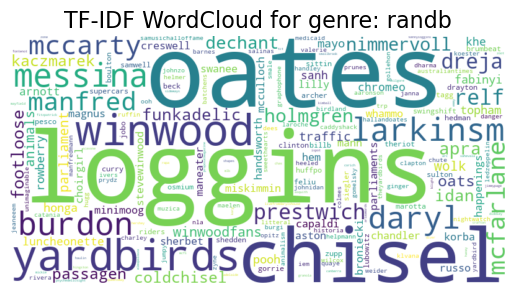

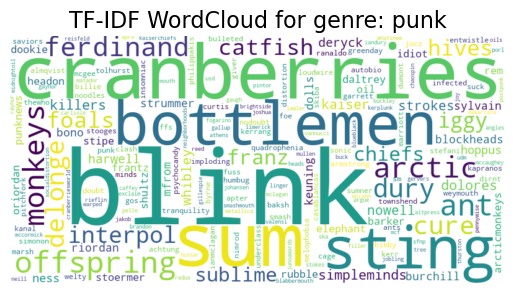

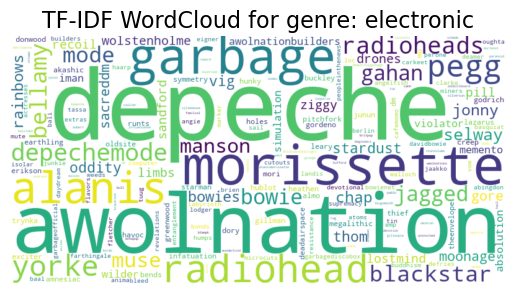

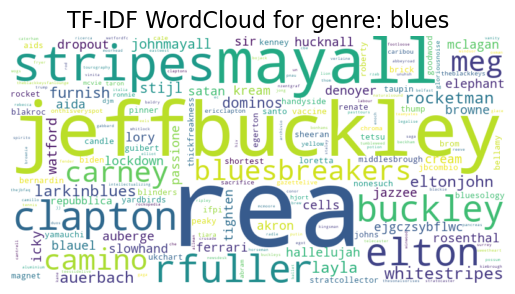

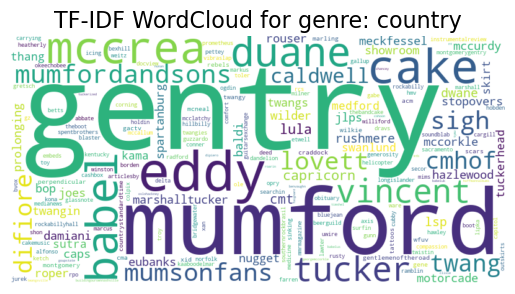

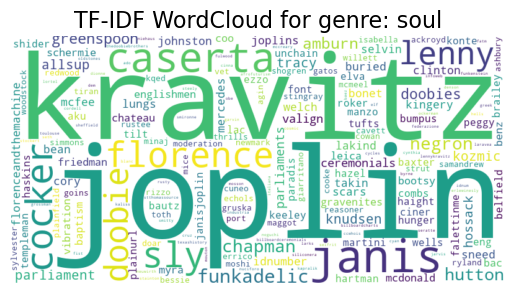

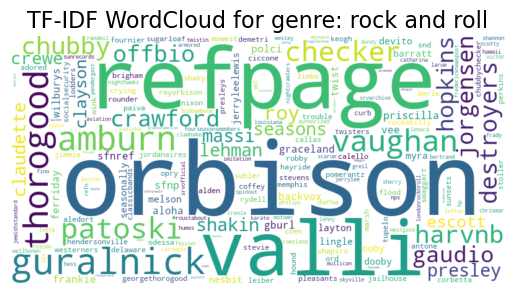

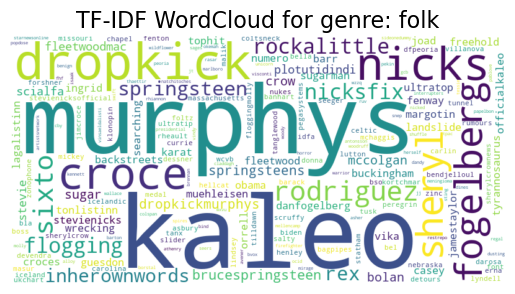

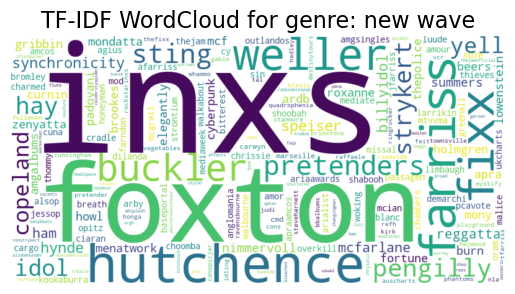

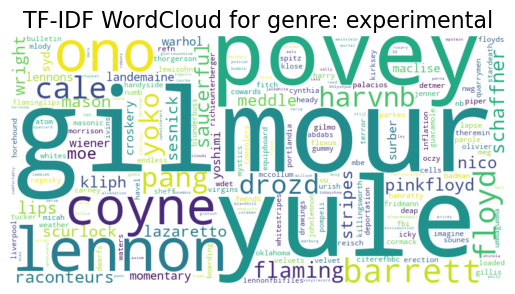

In [159]:
# Now for TF-IDF word clouds:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for genre, scores in genre_TFIDF.items():
    if not scores:
        continue
    
    # Optional: rescale to 0-100 for better visualization
    max_score = max(scores.values())
    scaled_scores = {w: (v / max_score) * 100 for w, v in scores.items()}
    
    wc = WordCloud(width=800, height=400,
                   background_color='white',
                   collocations=False)
    wc.generate_from_frequencies(scaled_scores)
    
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"TF-IDF WordCloud for genre: {genre}", fontsize=16)
    plt.show()

> **Explain your creation. Do the wordclouds/TF-IDF lists enable you to understand the communities you have found (or is it just gibberish)? Justify your answer.**\
> **ANSWER:**\

> Overall, we see that the TF-IDF wordclouds are more informative of their respective genres, especially emphasizing on band names or song titles that dominate the genres.\
> EDIT: these are old interpretations!

*Exercise*: Community Word-clouds
> * Redo the exercise above but for the 15 largest structural communities.
> * Do the word clouds seem more meaningful than for the genres? Optional: Add nuance to your answer by considering the confusion matrix $D$ that you calculated above.

Note that this is a great way of characterizing the structural communities if you don't have genre-labels (or other labels for that matter).

<div class="alert alert-block alert-info">
Todays exercices are getting, long and involved so you can do whatever parts of this one that you like with LLMs. Maybe you can even get one to solve the whole exercise?
</div>

Bomboclatt...

In [118]:
community_docs = defaultdict(str)

directory = "../data/rock_performers/"

for i, community in enumerate(communities[:15]): # top 15 largest communities
    for artist in community:
        # normalize path
        normalized_name = re.sub(r'[^a-zA-Z0-9]', '_', artist)
        possible_path = os.path.join(directory, f"{artist}.pkl")
        if not os.path.exists(possible_path):
            # fallback: fuzzy matching
            matches = [f for f in os.listdir(directory) if artist.lower().replace(" ", "_") in f.lower()]
            if matches:
                possible_path = os.path.join(directory, matches[0])
            else:
                continue
        # load text
        try:
            with open(possible_path, "rb") as f:
                data = pickle.load(f)
                text = ""
                if isinstance(data, str):
                    text = data
                elif isinstance(data, dict) and "text" in data:
                    text = data["text"]
                else:
                    try:
                        text = " ".join([v for v in data.values() if isinstance(v, str)])
                    except Exception:
                        text = ""
                community_docs[i] += " " + text
        except Exception:
            continue

print(f"Built text for {len(community_docs)} communities")

Built text for 4 communities


In [119]:
# Build the TFs for each community:
from collections import Counter

token_pattern = re.compile(r"\b[a-z]+\b")

community_TFs = {}

for i, text in community_docs.items():
    tokens = token_pattern.findall(text.lower())
    counts = Counter(tokens)
    # Optional: filter rare words
    counts = Counter({w: c for w, c in counts.items() if c >= 5})
    community_TFs[i] = counts

In [120]:
# Compute TF-IDF for each community:
import math

N = len(community_TFs)  # number of communities
word_df = defaultdict(int)

# compute DF
for counts in community_TFs.values():
    for word in counts:
        word_df[word] += 1

community_TFIDF = {}
for i, counts in community_TFs.items():
    tfidf = {}
    for word, tf in counts.items():
        df = word_df[word]
        idf = math.log(N / (1 + df))
        tfidf[word] = tf * idf
    community_TFIDF[i] = tfidf

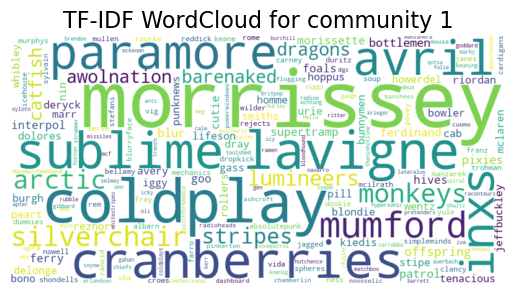

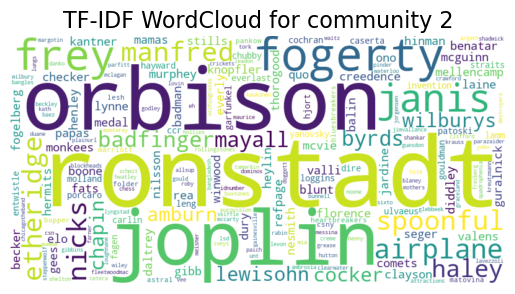

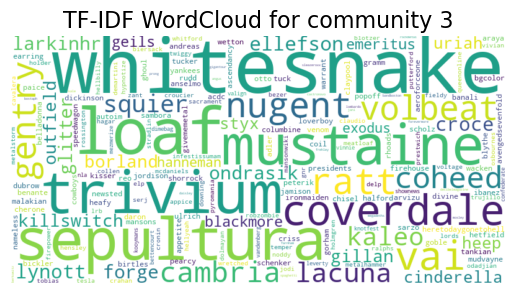

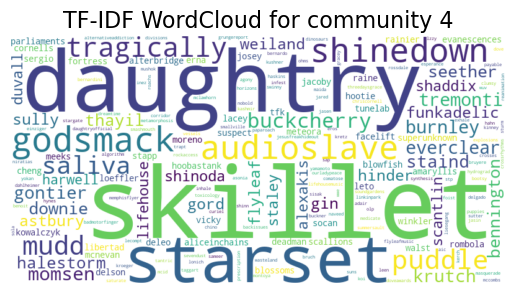

In [121]:
# Wordclouds:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i, scores in community_TFIDF.items():
    if not scores:
        continue
    # scale TF-IDF for visualization
    max_score = max(scores.values())
    scaled_scores = {w: (v / max_score) * 100 for w, v in scores.items()}

    wc = WordCloud(width=800, height=400, background_color='white', collocations=False)
    wc.generate_from_frequencies(scaled_scores)

    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"TF-IDF WordCloud for community {i+1}", fontsize=16)
    plt.show()

> **Do the word clouds seem more meaningful than for the genres? Optional: Add nuance to your answer by considering the confusion matrix $D$ that you calculated above.**\
> **ANSWER:**\
> We view the confusion matrix below.
> No... in my opinion then it might be a no, I would think that for instance, comm 1 is dominated by hard rock and alt + blues rock, then its words in the cloud will be dominated by the same words we see dominating each genre word cloud, but it does not seem like the case.\
> Another example is comm 3, dominated by alt rock, but alt rock is dominated by my chemical romance, however, we see that paramore is the largest word in comm 3's word cloud, but paramore dominates the new wave genre word cloud.

```
================================================================================
CONFUSION MATRIX D (Top 7 Genres vs. Top 7 Communities)
D(i,j) = Number of nodes with Genre i found in Community j
================================================================================
                   Comm 1 (191 nodes)  Comm 2 (154 nodes)  Comm 3 (137 nodes)
alternative rock                   42                   1                 103
hard rock                         127                  14                   3
pop rock                           16                  42                  49
rock                                1                  80                   3
alternative metal                  59                   0                   3
blues rock                         45                   7                   4
pop                                 0                  48                   4
================================================================================
```